In [1]:
import torch
print(torch.cuda.is_available())  # Should return True if the GPU is detected


True


In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="api_key")
project = rf.workspace("laschanh").project("facial_emotion_detection")
version = project.version(2)
dataset = version.download("yolov8") 


     |████████████████████████████████| 80 kB 82 kB/s eta 0:00:0111
     |████████████████████████████████| 1.2 MB 336 kB/s eta 0:00:01
     |████████████████████████████████| 66 kB 208 kB/s eta 0:00:01
     |████████████████████████████████| 54 kB 119 kB/s eta 0:00:01
     |████████████████████████████████| 126 kB 1.3 MB/s eta 0:00:01
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Facial_Emotion_Detection-2 in yolov8:: 100%|██████████| 43776/43776 [00:05<00:00, 8141.50it/s] 


In [7]:
!yolo train data=/home/omar_ben_emad/State of The Art/Facial_Emotion/Facial_Emotion_Detection-2/data.yaml model=yolov8l.pt epochs=50 lr0=0.01 plots=True


Traceback (most recent call last):
  File "/home/omar_ben_emad/.local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/home/omar_ben_emad/.local/lib/python3.8/site-packages/ultralytics/cfg/__init__.py", line 760, in entrypoint
    check_dict_alignment(full_args_dict, {a: ""})
  File "/home/omar_ben_emad/.local/lib/python3.8/site-packages/ultralytics/cfg/__init__.py", line 440, in check_dict_alignment
    raise SyntaxError(string + CLI_HELP_MSG) from e
SyntaxError: 'of' is not a valid YOLO argument. Similar arguments are i.e. ['conf'].

    Arguments received: ['yolo', 'train', 'data=/home/omar_ben_emad/State', 'of', 'The', 'Art/Facial_Emotion/Facial_Emotion_Detection-2/data.yaml', 'model=yolov8l.pt', 'epochs=50', 'lr0=0.01', 'plots=True']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of {'pose', 'detect', 'obb', 'classify', 'segment'}
                MODE (required) is one of {'export', 'pre

In [9]:
!yolo task=detect mode=train model=yolov8l.pt data="/home/omar_ben_emad/State of The Art/Facial_Emotion/Facial_Emotion_Detection-2/data.yaml" epochs=50 imgsz=320 plots=True


New https://pypi.org/project/ultralytics/8.3.27 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.89 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3904MiB)
engine/trainer: task=detect, mode=train, model=yolov8l.pt, data=/home/omar_ben_emad/State of The Art/Facial_Emotion/Facial_Emotion_Detection-2/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=320, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False

# Validate


In [10]:
!yolo task=detect mode=val model="/home/omar_ben_emad/State of The Art/Facial_Emotion/runs/detect/train2/weights/best.pt" data="/home/omar_ben_emad/State of The Art/Facial_Emotion/Facial_Emotion_Detection-2/data.yaml"

Ultralytics YOLOv8.2.89 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3904MiB)
Model summary (fused): 268 layers, 43,612,005 parameters, 0 gradients, 164.8 GFLOPs
val: Scanning /home/omar_ben_emad/State of The Art/Facial_Emotion/Facial_Emotion
val: WARNING ⚠️ /home/omar_ben_emad/State of The Art/Facial_Emotion/Facial_Emotion_Detection-2/valid/images/Surprised_551_png.rf.4efc46f0d2c62e7a3ce2571f06862d70.jpg: 1 duplicate labels removed
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all       1431       1475      0.433      0.583      0.471      0.415
                 Angry         75         79      0.372      0.544      0.415      0.349
             Disgusted         57         59      0.324      0.831      0.331      0.279
               Fearful         65         67     0.0846      0.731      0.187      0.167
                 Happy         66         73      0.387      0.767      0.593      0.523
    

# test

In [11]:
!yolo task=detect mode=predict model="/home/omar_ben_emad/State of The Art/Facial_Emotion/runs/detect/train2/weights/best.pt" conf=0.4 source="/home/omar_ben_emad/State of The Art/Facial_Emotion/Facial_Emotion_Detection-2/test/images" save=True

Ultralytics YOLOv8.2.89 🚀 Python-3.8.10 torch-2.4.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3050 Laptop GPU, 3904MiB)
Model summary (fused): 268 layers, 43,612,005 parameters, 0 gradients, 164.8 GFLOPs

image 1/1431 /home/omar_ben_emad/State of The Art/Facial_Emotion/Facial_Emotion_Detection-2/test/images/11_jpg.rf.a4103324e7e7c0dfefed29caa3b8fae3.jpg: 320x320 (no detections), 18.2ms
image 2/1431 /home/omar_ben_emad/State of The Art/Facial_Emotion/Facial_Emotion_Detection-2/test/images/25_jpg.rf.434757a32fefed896f4eae8407fa7ab0.jpg: 320x320 (no detections), 16.3ms
image 3/1431 /home/omar_ben_emad/State of The Art/Facial_Emotion/Facial_Emotion_Detection-2/test/images/30_jpg.rf.daaf6e3199244739873b9d47f1bc2d05.jpg: 320x320 3 Angrys, 2 Fearfuls, 4 Happys, 1 Neutral, 1 Sad, 16.4ms
image 4/1431 /home/omar_ben_emad/State of The Art/Facial_Emotion/Facial_Emotion_Detection-2/test/images/67_jpg.rf.ace6524c79d28127e86292eacb39adc1.jpg: 320x320 1 Angry, 1 Happy, 3 Neutrals, 2 Sads, 16.3ms
image 5/1431 /

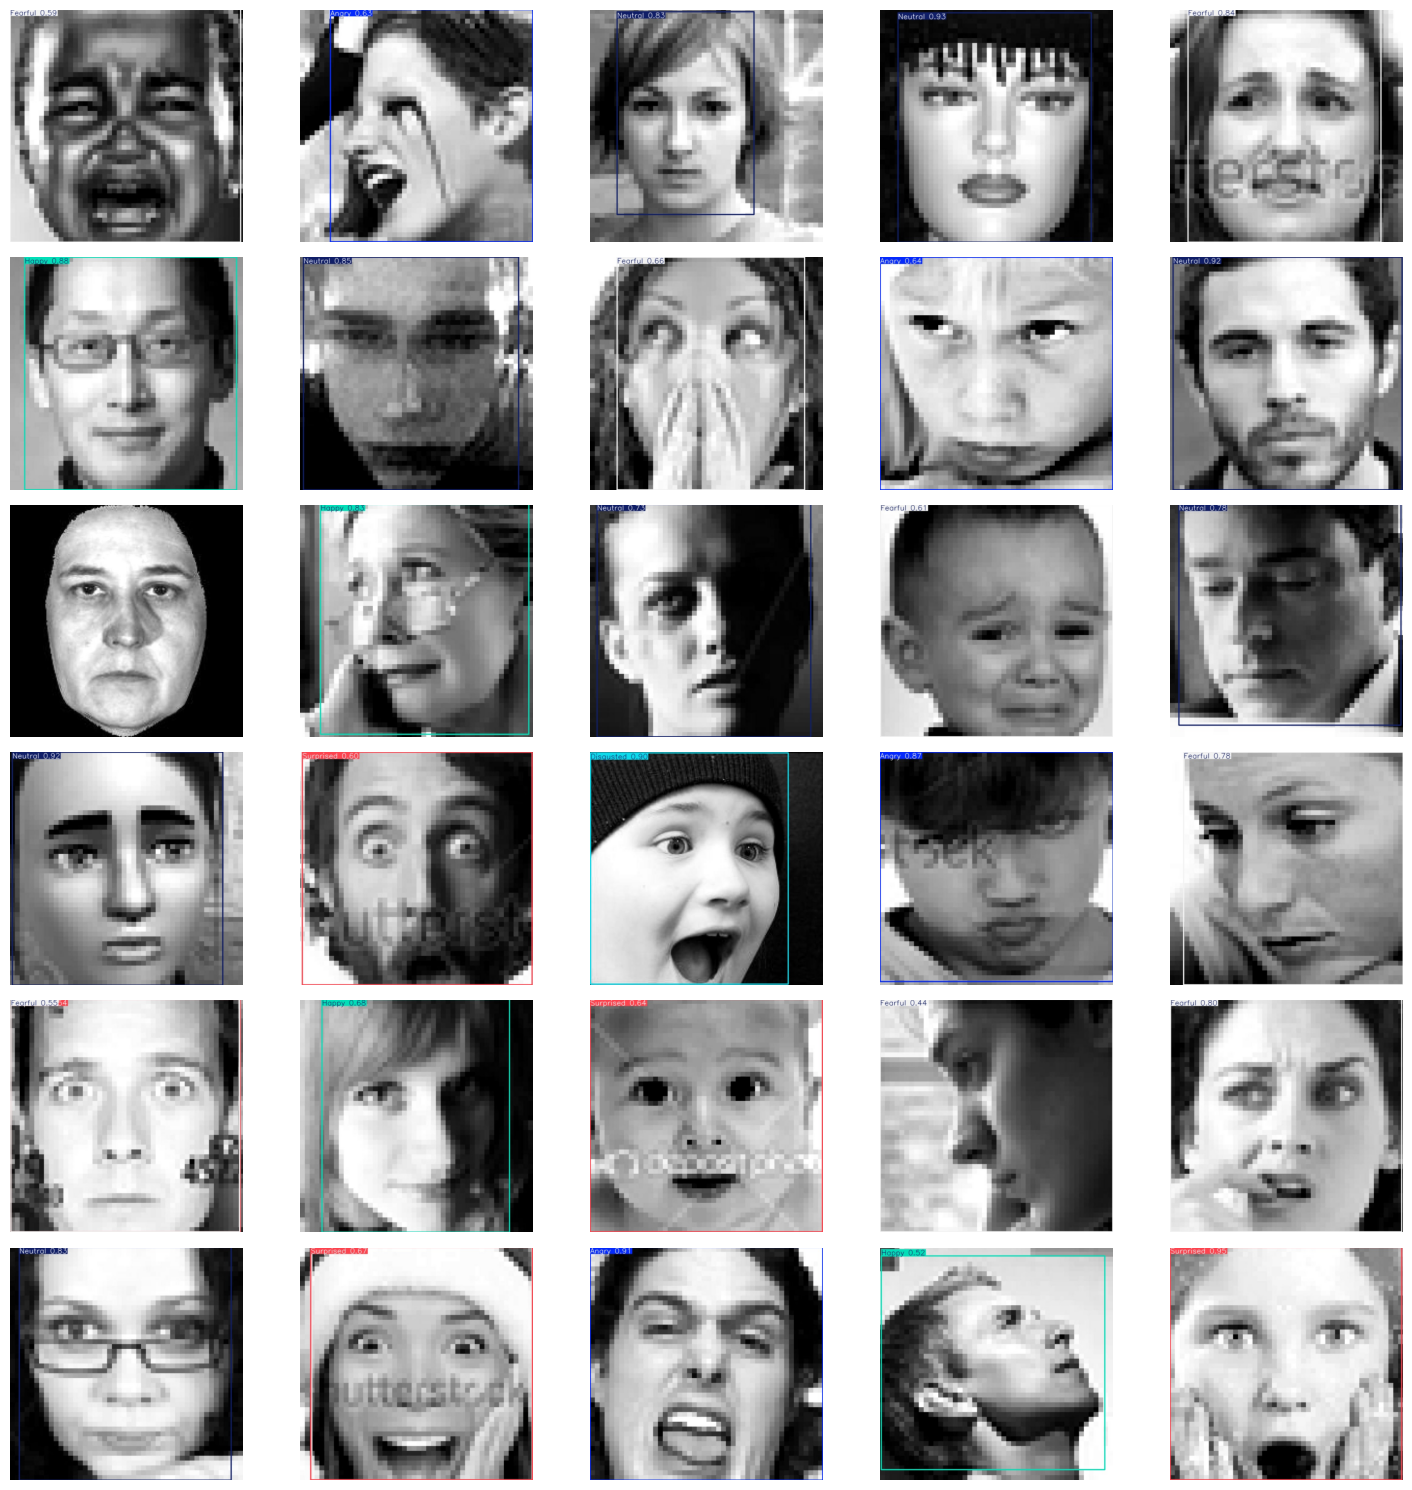

In [1]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the images folder
image_folder = '/home/omar_ben_emad/State of The Art/Facial_Emotion/runs/detect/predict'

# Get the list of image files in the directory
image_files = [f for f in os.listdir(image_folder) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif'))]

# Select 30 random images
random_images = random.sample(image_files, 30)

# Plot the images
plt.figure(figsize=(15, 15))
for i, image_file in enumerate(random_images):
    # Load the image
    img_path = os.path.join(image_folder, image_file)
    img = mpimg.imread(img_path)
    
    # Display the image in a subplot
    plt.subplot(6, 5, i+1)  # 6 rows, 5 columns
    plt.imshow(img)
    plt.axis('off')  # Hide the axes for better display

plt.tight_layout()
plt.show()
